# Assignment 2

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Friday, August 24, 2018**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Must I hand-in as a group?: **yes**

The assigment consist of one to three problems from each of the exercise sets you have solved so far (excluding Exercise Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

## Problems from exercise set 11

> **_Hint:_** you can get data by running 

```python
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]
```

> The following code gives you the required functions to work with:

```python
def random_weights(location = 0.0, scale = 0.01, seed = 1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= 1 + X.shape[1])    
    return w

def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)
```


> **Ex. 11.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an int which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus assignment, calculate the accuracy on training data using the updated weights. Any progress yet?

In [61]:
## To the peergraders: The codes in this cell is only to be able to run the answer to 11.1.5. It is codes from the
## previous exercises in session 11. 
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

# A very simple deterministic test-train split 
X_train = X[:70]
Y_train = y[:70]

X_test = X[70:]
Y_test = y[70:]

def random_weights(location = 0.0, scale=0.01, seed=1):
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size=1 + X_train.shape[1])
    return w

#random_weights()

len_w = 1 + X_train.shape[1]
w = np.random.normal(0,0.01,size=len_w)
w 

def net_input(X,W):
    z = W[0] + X.dot(W[1:])
    return z
print(net_input(X_train,w))

def predict(X, W) : 
    positive =  net_input(X,W)
    y_hat = np.where (positive>=0, 1, -1)
    return y_hat

predict(X_train, w)

[-0.10438104 -0.117066   -0.08894551 -0.08904692 -0.09738361 -0.09737238
 -0.09161584 -0.08394959 -0.09216471 -0.0923738  -0.09062817 -0.07528673
 -0.0864286  -0.09700619 -0.08053907 -0.11125672 -0.10089945 -0.09239552
 -0.10650486 -0.08167521 -0.09511315 -0.08996198 -0.09533662 -0.09441348
 -0.11159597 -0.09428278 -0.08485104 -0.0942867  -0.08824455 -0.09874215
 -0.08086448 -0.08594719 -0.09086811 -0.08022074 -0.08860496 -0.08264903
 -0.10983649 -0.11721132 -0.08213547 -0.08488528 -0.08258397 -0.09812064
 -0.08306329 -0.09501905 -0.0916454  -0.10081266 -0.10125647 -0.09227658
 -0.12847083 -0.08213155 -0.10049174 -0.10340197 -0.11719879 -0.09978161
 -0.09522555 -0.09821078 -0.11772152 -0.09798001 -0.10229669 -0.12190671
 -0.08748712 -0.10978916 -0.10231502 -0.10192711 -0.08194415 -0.0988867
 -0.09514793 -0.06795525 -0.09476137 -0.07191883]


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [62]:
# [Answer to Ex. 11.1.5]
eta = 0.1
errors_ = []

def f(X, y, W, eta):
    errors = 0
    for xi, yi in zip(X,y):
        update = eta * (yi - predict(xi, W))
        W[1:] += update * xi
        W[0] += update
        errors += int(update != 0)

    return W, errors

w1 = f(X_train, Y_train, random_weights(), eta)

print(w1)
f(X_train, Y_train, w1[0], eta)

(array([-0.58375655, -1.56611756, -0.76528172,  1.00927031,  1.36865408]), 33)


(array([-0.98375655, -2.70611756, -1.46528172,  0.90927031,  1.86865408]), 16)

> **Ex. 11.1.6:** Write a function which repeat the updating procedure you constructed in 11.1.5 for `n_iter` times by packing the whole thing in an outer loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```
>
>> _Bonus:_ Wrap the code in a function called Perceptron.

[-0.58375655 -1.56611756 -0.76528172  1.00927031  1.36865408]
[-0.98375655 -2.70611756 -1.46528172  0.90927031  1.86865408]
[-1.38375655 -3.10611756 -1.90528172  2.88927031  3.28865408]
[-1.78375655 -4.22611756 -2.70528172  3.24927031  3.96865408]
[-2.18375655 -4.84611756 -3.42528172  4.14927031  5.00865408]
[-2.58375655 -5.52611756 -4.04528172  4.72927031  5.98865408]
[-2.78375655 -5.14611756 -3.84528172  5.96927031  6.92865408]
[-3.18375655 -6.18611756 -4.48528172  5.82927031  7.14865408]
[-3.58375655 -6.96611756 -4.88528172  6.16927031  7.84865408]
[-3.78375655 -6.92611756 -4.98528172  6.80927031  8.40865408]
[-4.18375655 -7.70611756 -5.38528172  7.14927031  9.10865408]
[-4.38375655 -7.78611756 -5.62528172  7.66927031  9.60865408]
[-4.58375655 -7.96611756 -5.90528172  7.96927031 10.04865408]
[-4.78375655 -8.14611756 -6.14528172  8.04927031 10.28865408]
[-4.78375655 -7.98611756 -6.04528172  8.20927031 10.42865408]
[-4.98375655 -8.30611756 -6.46528172  8.28927031 10.66865408]
[-4.9837

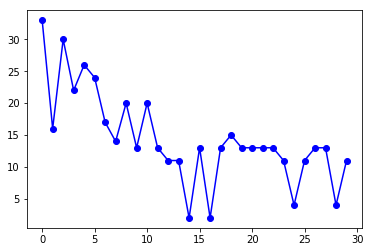

In [63]:
# [Answer to Ex. 11.1.6]
def g(X, y, n_iter):
    eta = 0.1
    weights = random_weights()
    errorseq = list()

    for element in range(n_iter):
        weights, e = f(X, y, weights, eta) 
        errorseq.append(e)
        print(weights)
    return weights, errorseq

w_, errorseq_est = g(X_train, Y_train, 30)

plt.plot(range(30), errorseq_est, 'b-o')
plt.show()

## Problems from exercise set 12
>Get the required data by running 

```python
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
```

> **Ex. 12.2.0:** Load the california housing data with scikit-learn using the code above. Inspect the data set. 

In [32]:
# [Answer to Ex. 12.2.0]
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

print(X_train.head(3))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
10089  4.0893      35.0  5.267760   0.983607      1056.0  2.885246
2136   3.7578      24.0  5.061538   0.957692       781.0  3.003846
17546  2.4306      39.0  4.899209   1.069170      1990.0  3.932806


> **Ex.12.2.1**: Generate interactions between all features to third degree, make sure you **exclude** the bias/intercept term. How many variables are there? Will OLS fail? 
>
> After making interactions rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  
>
>> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`
>
>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [34]:
# [Answer to Ex. 12.2.1]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


#Interactions X-train
interaction = PolynomialFeatures(degree=3, include_bias=False)
X_inter_train = interaction.fit_transform(X_train)

#Interactions X-test
X_inter_test = interaction.fit_transform(X_test)

#Rescaling
scale = StandardScaler()
norm = scale.fit(X_inter_train)

#Her burges normaliseringen til at normalisere både test og train, 
#Note! you should use the distribution of the training data to rescale the test data
X_train_final = norm.transform(X_inter_train)
X_test_final = norm.transform(X_inter_test)

> **Ex.12.2.2**: Estimate the Lasso model on the train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the test and train data. 
>
>> *Hint*: use `logspace` in numpy to create the range.


In [38]:
# [Answer to Ex. 12.2.2]
#This exercise is solved with the knowledge gained from session 13. 
#We are aware that there are other ways to solve the problem, but believe that we still have gained the right results. 
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, LinearRegression
import math
from sklearn.pipeline import make_pipeline

lambdas =  np.logspace(-4, 4, 10)
pipe_lasso = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),                           
                           StandardScaler(),
                           Lasso(random_state=1))
rmse_test = []
rmse_train = []
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    pipe_lasso.fit(X_train, y_train)
        
    rmse_test.append(math.sqrt(mse(pipe_lasso.predict(X_test), y_test)))  
    rmse_train.append(math.sqrt(mse(pipe_lasso.predict(X_train), y_train)))  
    
print(rmse_test)
print(rmse_train)

[8.369685019744079, 5.8267452987169674, 1.4043449326874313, 0.8119447055440083, 0.9017142603230563, 1.1575985329014546, 1.1575985329014546, 1.1575985329014546, 1.1575985329014546, 1.1575985329014546]
[0.6980856901662994, 0.7002139925652013, 0.7330082008643843, 0.8033972569913853, 0.8986891710353927, 1.1502742926333995, 1.1502742926333995, 1.1502742926333995, 1.1502742926333995, 1.1502742926333995]


> **Ex.12.2.3**: Make a plot with on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

The optimal value is between 10^(-2) and 10^(-1), more precise 0.0464


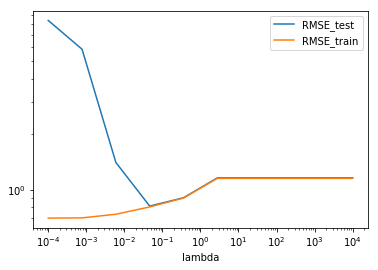

In [39]:
# [Answer to Ex. 12.2.3]
data = np.array([rmse_test, rmse_train])
#Creating pandas dataframe from numpy array
RMSE = pd.DataFrame({'RMSE_test':data[0,:],
                     'RMSE_train':data[1,:], 
                     'lambda':lambdas})\
                .set_index('lambda')

#print(RMSE)
optimal = pd.DataFrame(RMSE, index=lambdas).mean(axis=1).nsmallest(1)
RMSE.plot(logx=True, logy=True)
print('The optimal value is between 10^(-2) and 10^(-1), more precise 0.0464' )

## Problems from exercise set 13

> **Ex. 13.1.3:**
Run a Lasso regression using the Pipeline from `Ex 13.1.2`. In the outer loop searching through the lambdas specified below. 
In the inner loop make 5 fold cross validation on the selected model and store the average MSE for each fold. Which lambda gives the lowest test MSE?
>
> ```python 
lambdas =  np.logspace(-4, 4, 12)
```
>
>> *Hint:* `KFold` in `sklearn.model_selection` may be useful.
>
> This code will give you the required data: 

In [40]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

In [42]:
def rmse(y_pred, y_true):
    return np.sqrt(mse(y_pred, y_true))

output = []

for random_state in range(10):
    X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=random_state)    
    X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=random_state)

    reg = LinearRegression().fit(X_train, y_train)
    reg.predict(X_test)

    output.append([rmse(reg.predict(X_val), y_val),
                   rmse(reg.predict(X_test), y_test)])
    
pd.DataFrame(output, columns=['test', 'validation']).describe()

,test,validation
count,10.000000,10.000000
mean,1.143827,1.101885
std,0.978098,0.658022
min,0.777620,0.773043
25%,0.781633,0.787416
50%,0.794827,0.794032
75%,0.800074,0.809688
max,3.899375,2.504750


In [43]:
# [Answer to Ex. 13.1.3]
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5)
mseCV = []
lambdas = np.logspace(-4,4,12) 
for lambda_ in lambdas:
    
    pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train, = X_dev.iloc[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    
    mseCV.append(mseCV_)
    
optimalCV = pd.DataFrame(mseCV,index=lambdas).mean(axis=1).nsmallest(1)
print(optimalCV)

0.015199    0.579633
dtype: float64


## Problems from exercise set 14

> **Ex. 14.1.3**: Train a decision tree classifier on **all** of the titanic data.
>
>* If your feature matrix is `X` and your target array is `y` you can do this by instantiating a model like:
>
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(X, y)  # <--- This is the training/fitting/learning step
>       
>Write four functions that counts the number of ..
 - true positives where we call the function `TP`;
 - true negatives where we call the function `TN`;
 - false positives where we call the function `FP`;
 - false negatives where we call the function `FN`.

> All of these functions should take three arguments, the actual y column, the actual X column and a fittedModel object (e.g. `fittedModel = DecisionTreeClassifier.fit(X,y)`)
>
>> _Hint 1:_ use the function `np.where` to compare y and the predicted values. For example `y + prediction == 2` is true only for the True Positives.
>
>> _Hint 2:_ You can check if your result is correct by summing all four functions and checking that the result equals to the number of observations. 
>
> Get the data by running:

In [44]:
#this cell contains codes necessary to make 14.1.3 running. The answer to the exercise is presented below. 
rawdata = sns.load_dataset('titanic').sample(frac=1, random_state = 3)

# Feature creation
rawdata['male'] = (rawdata['sex'] == 'male').astype(int)
rawdata['alone'] = rawdata['alone'].astype(int)
rawdata['adult_male'] = rawdata['adult_male'].astype(int)


# The following piece of code (in multiple lines) generates 
# dummies for all of the categorical variables. 
data = pd.get_dummies(rawdata, 
                      columns = ['class', 'sibsp', 'parch', 'deck'], 
                      drop_first=True)\
         .drop(['pclass', 'sex', 'embarked', 'who', 'embark_town', 'alive'], axis = 1)


data = data.dropna().reset_index()

X = np.array(data.drop('survived', axis = 1))
y = np.array(data['survived'])

In [45]:
#this cell contains codes necessary to make 14.1.3 running. The answer to the exercise is presented below. 
rawdata = sns.load_dataset('titanic').sample(frac=1, random_state = 3)
rawdata['male'] = (rawdata['sex'] == 'male').astype(int)
rawdata['alone'] = rawdata['alone'].astype(int)
rawdata['adult_male'] = rawdata['adult_male'].astype(int)
data = pd.get_dummies(rawdata, 
                      columns = ['class', 'sibsp', 'parch', 'deck'], 
                      drop_first=True)\
         .drop(['pclass', 'sex', 'embarked', 'who', 'embark_town', 'alive'], axis = 1)
print(data.head())

     survived   age     fare  adult_male  alone  male  class_Second  \
395         0  22.0   7.7958           1      1     1             0   
85          1  33.0  15.8500           0      0     0             0   
201         0   NaN  69.5500           1      0     1             0   
542         0  11.0  31.2750           0      0     0             0   
702         0  18.0  14.4542           0      0     0             0   

     class_Third  sibsp_1  sibsp_2   ...    parch_3  parch_4  parch_5  \
395            1        0        0   ...          0        0        0   
85             1        0        0   ...          0        0        0   
201            1        0        0   ...          0        0        0   
542            1        0        0   ...          0        0        0   
702            1        0        0   ...          0        0        0   

     parch_6  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  
395        0       0       0       0       0       0       0  
85      

In [46]:
#this cell contains codes necessary to make 14.1.3 running. The answer to the exercise is presented below. 
data = data.dropna().reset_index()

X = np.array(data.drop('survived', axis = 1))
y = np.array(data['survived'])

In [47]:
# [Answer to Ex 14.1.3]
#We are aware of the fact that our functions do not take three arguments. 
#We have done the solution in a slightly different way, which gives us the same answer, 
#as if we had done it with three arguments the function. 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
fitted_model = model.fit(X, y)  # <--- This is the training/fitting/learning step

prediction = fitted_model.predict(X)

def TP(y_, pred):
    TP = np.where(y_ + pred == 2, 1, 0) #TP
    return np.sum(TP)
def TN(y_, pred):
    TN = np.where(y_ + pred == 0, 1, 0) #TN
    return np.sum(TN)
def FN(y_, pred):
    FN = np.where(np.logical_and(y_ == 1, pred == 0), 1, 0)#FN
    return np.sum(FN)
def FP(y_, pred):
    FP = np.where(np.logical_and(y_ == 0, pred == 1), 1,0) #FP
    return np.sum(FP)
print(TP(y, prediction))
print(TN(y, prediction))
print(FP(y, prediction))
print(FN(y, prediction))

290
424
0
0


> **Ex. 14.1.4:** Combine the four functions you defined above to write your own accuracy function, which calculates
$$
ACC = \frac{TP + TN}{TP+ TN + FP + FN}
$$
>
> Test the accuracy of your model using the `A` function. Report the accuracy of your model on the same data that you trained the model on.
>
>> _Note:_ The reason we want to split the calculation of accuracy into these four components, is that we can then easily calculate other scores, such as the _precision, recall and f1_.

In [9]:
# [Answer to Ex 14.1.4]
def ACC(y_, pred) :  
    ACC = (TP(y_, pred) + TN(y_, pred)) / (TP(y_, pred) + TN(y_, pred) + FN(y_, pred) + FP(y_, pred))
    return ACC
ACC(y, prediction)

1.0

## Problems from exercise set 15 

> **Ex. 15.1.1:** 
Import the Counter object from the builtin package collections (Hint1). This is essentially a dictionary designed for keeping counts, same syntax, but extra functionality. We don't have to initialize each key. We can write: 

```python
c = Counter()
# then we can do this
c['hej']+=1
# without first defining c['hej'] = 0
```


>* Initialize a Counter object and assign it to the variable `dc` (document count).
>* Define a list named `text_counts`. In this container we will store each document after we have converted it to counts of tokens.
>* Run through all tokenized texts and
    * initialize a Counter object with the tokenized text as input, assign this object to a variable `c_t`. >This will now contain a count of each token in the document. Append `c_t` to our list `text_counts`.
    * run though each key in the `c_t` and increment the document count variable `dc` by one. (Hint2)

(hint1: from ... import ...)

(hint2: dc[token]+=1)

> Run the following code to get the data:

In [50]:
import nltk
nltk.download('punkt')
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')
import re
token_re = re.compile('\w+')

tokenized = df.reviewBody.apply(nltk.word_tokenize)

tokenized

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victoriamariastokholmhundevad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [Lots, of, inventory, ,, very, fast, and, effi...
1       [I, did, not, received, the, map, I, had, orde...
2       [After, searching, a, number, of, stores, here...
3       [Website, is, not, intuitive, ., I, do, n't, l...
4       [Outstanding, customer, service, ,, appreciate...
5       [Waiting, in, line, to, get, on, the, Big, Bus...
6       [I, 've, been, to, the, 'other, ', sac, store,...
7       [I, do, n't, even, bother, making, hotel, rese...
8                                      [Great, packaging]
9       [They, hurt, like, crazy, .., not, worth, the,...
10      [We, were, told, the, dentist, could, Do, seda...
11                         [Very, Good, Company, :, -, )]
12      [Helpful, ,, friendly, and, did, n't, give, me...
13      [Delivered, very, quickly, and, exactly, what,...
14      [Very, nice, calendars, ,, cards, ,, and, stat...
15      [I, had, to, move, my, car, from, Dublin, ,, O...
16      [the, signs, were, made, very, well, ,, very, ...
17      [One, 

In [51]:
# [Answer to Ex. 15.1.1]
from collections import Counter

dc = Counter()
text_counts = []

for doc in tokenized.values:
    c_t = Counter(doc)
    text_counts.append(c_t)
    
    for token in c_t:
        dc[token]+=1

dc.most_common(5) #hvilket ord der mest normale 
doc

['If',
 'you',
 "'re",
 'looking',
 'for',
 'an',
 'informative',
 'website',
 'on',
 'loans',
 'this',
 'is',
 'the',
 'website',
 'to',
 'do',
 'your',
 'research',
 '.',
 'I',
 "'ve",
 'been',
 'to',
 'a',
 'lot',
 'of',
 'loan',
 'website',
 'and',
 'this',
 'one',
 'provides',
 'the',
 'best',
 'detailed',
 'information',
 '.',
 'I',
 "'ve",
 'only',
 'melt',
 'the',
 'tip',
 'of',
 'the',
 'iceberg',
 'with',
 'the',
 'website',
 '.',
 'I',
 'plan',
 'on',
 'using',
 'the',
 'car',
 'loan',
 'sections',
 'to',
 'a',
 'great',
 'extent',
 '.']

> **Ex. 15.1.2:** 
Now we define the the inverse document frequency variable `idf` as a dictionary with the tokens as keys and idf weights as values. We do this by running through both the token and the value (document count) in the `dc` variable and calculate the ratio between number documents and the token document counts. 

>Use the `np.log` function for the log transform.

>We can iterate through this using the `.items()` syntax we know from the dictionary. 


In [52]:
# [Answer to Ex. 15.1.2]
import numpy as np
total_docs = len(tokenized)
idf = []

# vi laver en ordbog med antal af gange hvert ord går igen gennem alt tekst 
for token, count in dc.items() :
    value = np.log(total_docs/count)
    idf.append([token, count])
idf = dict(idf)
idf

{'Lots': 20,
 'of': 2604,
 'inventory': 20,
 ',': 4012,
 'very': 1820,
 'fast': 685,
 'and': 6214,
 'efficient': 139,
 '.': 7546,
 'I': 5112,
 'would': 1163,
 'recommend': 773,
 'this': 1350,
 'company': 721,
 'did': 752,
 'not': 1360,
 'received': 562,
 'the': 5076,
 'map': 3,
 'had': 1368,
 'ordered': 684,
 'paid': 177,
 'for': 2887,
 'within': 212,
 'stated': 48,
 'delivery': 475,
 'time': 1242,
 'emailed': 51,
 'Mapscompany': 1,
 'their': 581,
 'only': 533,
 'first': 428,
 'response': 144,
 'was': 3409,
 'to': 4822,
 'send': 142,
 'me': 1384,
 'an': 860,
 'invitation': 7,
 'review': 101,
 'my': 2774,
 'experience': 678,
 '!': 2657,
 'My': 527,
 'initial': 27,
 'therefore': 11,
 'extremely': 171,
 'negative': 32,
 'Since': 26,
 'then': 298,
 'a': 3899,
 'support': 137,
 'team': 96,
 'member': 39,
 'reassuring': 3,
 'but': 1223,
 'ultimately': 6,
 "n't": 1039,
 'provide': 60,
 'with': 2593,
 'any': 415,
 'concrete': 5,
 'information': 161,
 'as': 1075,
 'where': 180,
 'The': 1665,
 '

> **Ex. 15.1.3:** 
Now we weight the term frequency in each document with the idf value of each token. Here we used our `text_counts` variable that almost holds the frequency, we just need to divide by the number of tokens in the document. 
Define a list container: `tfidf_docs`. 

FIRST LOOP: For each counter in the text_count container:
    * define the variable `doc_n` as sum of all values in the counter - `.values()` .
    * define a dictionary named `tfidf`.
    * SECOND LOOP: run through all tokens, and their counts by using the `.items()` method of the counter.
        * define a value tf as the ratio between the count and the sum.
        * now weight this value with the idf weight found by calling the idf variable with the token as key.
        * assign this weighed term frequency to the tfidf[token].
    * Once outside the second loop. Append the tfidf dictionary to the tfidf_docs list container.

In [53]:
# [Answer to Ex. 15.1.3]
tfidf_docs = []

for counter in text_counts:
    doc_n = sum(counter.values()) 
    tfidf = {}

    for key, value in counter.items():
        tf = count/doc_n
        tfidf[key] = tf
    tfidf_docs.append(tfidf)
        
tfidf_docs 

[{'Lots': 0.06666666666666667,
  'of': 0.06666666666666667,
  'inventory': 0.06666666666666667,
  ',': 0.06666666666666667,
  'very': 0.06666666666666667,
  'fast': 0.06666666666666667,
  'and': 0.06666666666666667,
  'efficient': 0.06666666666666667,
  '.': 0.06666666666666667,
  'I': 0.06666666666666667,
  'would': 0.06666666666666667,
  'recommend': 0.06666666666666667,
  'this': 0.06666666666666667,
  'company': 0.06666666666666667},
 {'I': 0.01098901098901099,
  'did': 0.01098901098901099,
  'not': 0.01098901098901099,
  'received': 0.01098901098901099,
  'the': 0.01098901098901099,
  'map': 0.01098901098901099,
  'had': 0.01098901098901099,
  'ordered': 0.01098901098901099,
  'and': 0.01098901098901099,
  'paid': 0.01098901098901099,
  'for': 0.01098901098901099,
  'within': 0.01098901098901099,
  'stated': 0.01098901098901099,
  'delivery': 0.01098901098901099,
  'time': 0.01098901098901099,
  '.': 0.01098901098901099,
  'emailed': 0.01098901098901099,
  'Mapscompany': 0.0109890

## Problems from exercise set 16


> **Ex. 16.2.5:** You should now implement it by doing the following:
* Define a maximum number of iterations`max_iter` to 15.
* Use the `initialize_clusters` function to define a variable `centroids`.
* make a `for` loop from 0 to max_iter where you: 
    * copy the current cluster centroids to a new variable: old_centroids. This will be used for checking convergence after the maximization step.
    * define the `cluster_assignment`  by running the `maximize` function
    * define a new (i.e. overwrite) `centroids` variable by running the `update_expectation` function.
    * finally check if old_centroids is equal to new_centroids, using the np.array_equal() function. If they are: break.

Make sure that it works and wrap it around a function `fit_transform()` that takes the data `X` as input, and the number of clusters `k` plus the maximum number of iterations `max_iter`. It should return the cluster assignments and the cluster centroids. 


> The code below will give you the dataset, as well as three functions you need to solve the exercise.

In [15]:
import seaborn as sns 
import pandas as pd 
import random
from sklearn.metrics import pairwise_distances

df = sns.load_dataset('iris')
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values

def initialize_clusters(X_, k_):
    c = list(range(len(X_)))
    sample = random.sample(c, k_)
    centroids = X_[sample]
    return centroids

centroids = initialize_clusters(X, 3) #k=3
centroids


def maximize(centroids_, X_):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = pairwise_distances(centroids_, X_)
    cluster_assignment = distances.T.argsort(axis=1)[:,0]
    return cluster_assignment

closest_centroid = maximize(centroids, X)
closest_centroid


import numpy as np

def update_expectations(X_, closest_centroid_, centroid_):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([X_[closest_centroid_==k].mean(axis=0) for k in range(centroid_.shape[0])])

update_expectations(X, closest_centroid, centroids)


array([[5.00784314, 3.40980392, 1.49215686, 0.2627451 ],
       [6.00465116, 2.7744186 , 4.24186047, 1.32790698],
       [6.48035714, 2.95357143, 5.45      , 1.95357143]])

In [17]:
# [Answer to Ex. 16.2.5]
k = 3
max_iter = 15

def fit_transform(X_, k_, n_iter):
    centroids = initialize_clusters(X_, k_)
    for centroid in range(0, n_iter):
        old_centroids = centroids
        cluster_assignment = maximize(centroids, X_)
        centroids = update_expectations(X_, cluster_assignment, old_centroids)
        if np.array_equal(old_centroids, centroids):
            break
        return cluster_assignment, centroids
        
fit_transform(X, k, max_iter)

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([[4.92222222, 3.19333333, 1.66444444, 0.32666667],
        [5.45      , 3.95      , 1.48      , 0.27      ],
        [6.32105263, 2.89894737, 4.98947368, 1.71052632]]))